In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic') 			 
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.size'] = 10


df = pd.read_csv('/Users/kyuree/Desktop/pds_capstone1/model_dataset/최종모델링_데이터셋.csv')  

numerical_columns = ['Quarter1','Quarter2','Quarter3','Quarter4','1~3월 발생건수','4~6월 발생건수','7~9월 발생건수','10~12월 발생건수']
X = df[numerical_columns]
y = df['교통사고_발생률']


In [2]:
# 데이터 스케일링 (예시)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)


In [3]:
# 모델 학습 및 예측

lr = LinearRegression()
model = lr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
pred_test = model.predict(X_test)


In [4]:
# 전체 데이터에 대한 예측
df['Prediction'] = model.predict(scaler.transform(df[['Quarter1','Quarter2','Quarter3','Quarter4','1~3월 발생건수','4~6월 발생건수','7~9월 발생건수','10~12월 발생건수']]))
df = df.iloc[:, 1:]
df

,자치구명,Quarter1,Quarter2,Quarter3,Quarter4,1~3월 발생건수,4~6월 발생건수,7~9월 발생건수,10~12월 발생건수,교통사고_발생률,Prediction
0,강남구,180697984,182064937,182780256,178837366,106,101,81,101,5.370106e-07,5.699290e-07
1,강북구,88659789,88039328,88461872,86585134,61,62,52,65,6.823103e-07,7.565986e-07
2,강서구,154120228,153545282,154686616,151851221,54,65,65,74,4.200563e-07,3.773226e-07
3,관악구,144753927,145040299,144001946,141455320,62,54,73,61,4.345925e-07,3.445530e-07
4,광진구,103837008,104892512,103933231,102889237,39,39,33,33,3.465270e-07,3.381659e-07
5,구로구,108033576,107338945,108041245,106511146,73,51,32,68,5.210212e-07,5.241186e-07
6,금천구,56240778,56113342,56358652,55608726,54,25,34,34,6.553095e-07,6.433039e-07
7,노원구,150932450,150430089,149847861,147757206,72,67,52,65,4.274021e-07,3.523485e-07
8,도봉구,83455609,83081457,83024598,80958745,42,33,36,39,4.538298e-07,4.783697e-07
9,동대문구,98046836,99645140,98126508,98014400,71,55,56,77,6.576393e-07,6.615691e-07


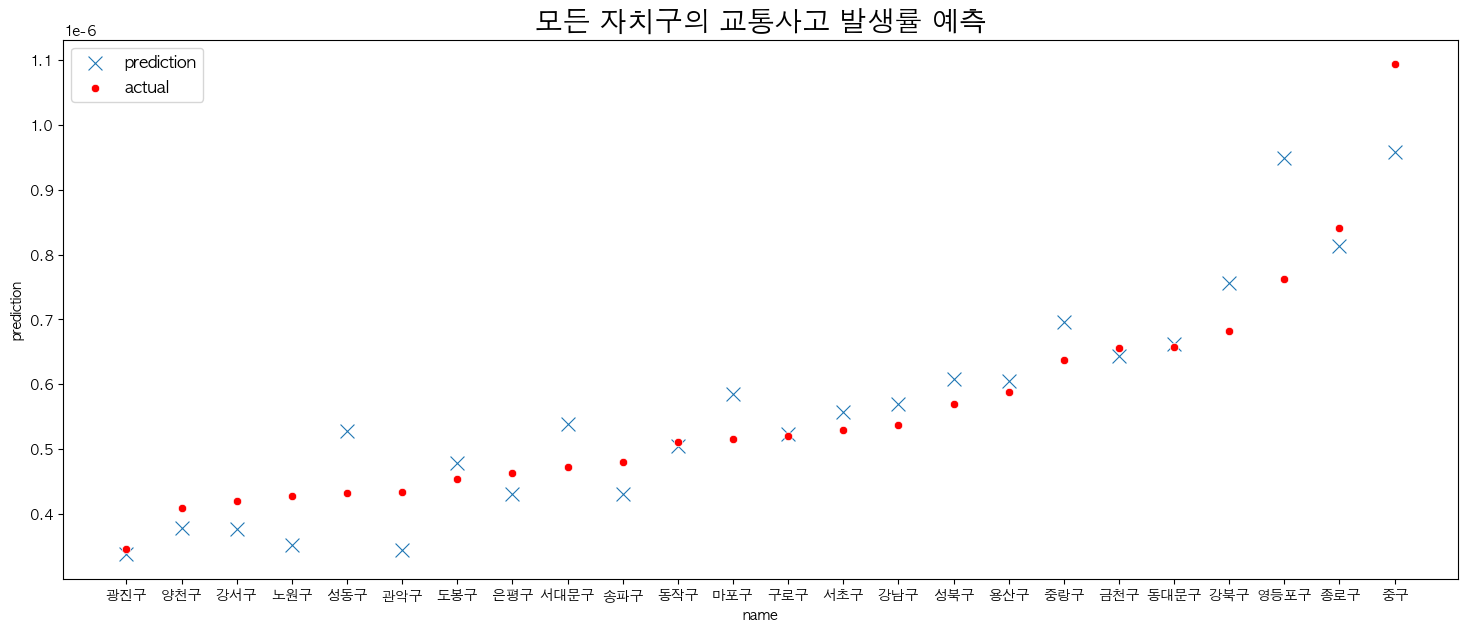

In [5]:
# 예측 결과 시각화 (예시)
df_result = pd.DataFrame({'name':df['자치구명'],'actual': y, 'prediction': df['Prediction']})
df_result = df_result.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(18, 7))
sns.scatterplot(x=df_result.name, y=df_result['prediction'], marker='x', palette='tab10', s=100)
sns.scatterplot(x=df_result.name, y=df_result['actual'], marker='o', color='red')
plt.title("모든 자치구의 교통사고 발생률 예측", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [6]:
# 모델 평가
print("R square of train set :",model.score(X_train, y_train))  # training set의 R square
print("R square of test set :",model.score(X_test, y_test))  # test set의 R square
print("RMSE: ",sqrt(mean_squared_error(y_test, pred_test)))  # RMSE
print("Mean Squared Error:", mean_squared_error(y_test, pred_test)) #mse

R square of train set : 0.9043436719155198
R square of test set : 0.31034571818339174
RMSE:  1.0328699556041913e-07
Mean Squared Error: 1.066820345189804e-14
